In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/content/sector_data.csv")

# 1) Parse DATE to datetime
data["DATE"] = pd.to_datetime(data["DATE"])

# 2) Set it as the index
data = data.set_index("DATE")

# 3) Sort
data = data.sort_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 1990-01-01 to 2025-07-01
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   government_balance  143 non-null    float64
 1   private_balance     142 non-null    float64
 2   foreign_balance     143 non-null    float64
 3   gdp                 143 non-null    float64
 4   non_gov_balance     142 non-null    float64
 5   government_pct_gdp  143 non-null    float64
 6   private_pct_gdp     142 non-null    float64
 7   foreign_pct_gdp     143 non-null    float64
 8   non_gov_pct_gdp     142 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


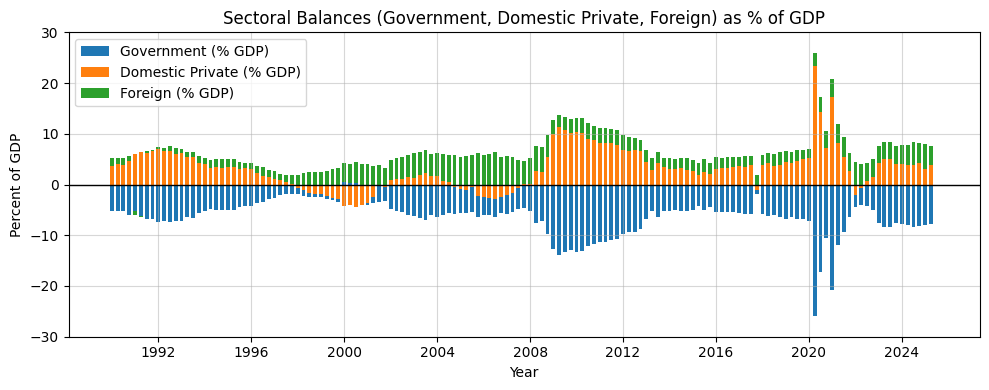

In [6]:
# Pull series
x = data.index
gov  = data["government_pct_gdp"].astype(float)
priv = data["private_pct_gdp"].astype(float)
forn = data["foreign_pct_gdp"].astype(float)

# Split into positive/negative parts for correct stacking
gov_pos,  gov_neg  = gov.clip(lower=0),  gov.clip(upper=0)
priv_pos, priv_neg = priv.clip(lower=0), priv.clip(upper=0)
forn_pos, forn_neg = forn.clip(lower=0), forn.clip(upper=0)

# Cumulative bottoms (positive stack)
pos_bottom_priv = gov_pos
pos_bottom_forn = gov_pos + priv_pos

# Cumulative bottoms (negative stack)
neg_bottom_priv = np.zeros(len(data))          # private touches 0
neg_bottom_gov  = priv_neg                   # gov hangs below private
neg_bottom_forn = priv_neg + gov_neg         # foreign hangs below both

# Use the current matplotlib default cycle colors, but lock them per sector
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
c_gov, c_priv, c_forn = cycle[0], cycle[1], cycle[2]

plt.figure(figsize=(10, 4))

# Positive stacks (legend labels)
plt.bar(x, gov_pos,  width=60, color=c_gov,  label="Government (% GDP)")
plt.bar(x, priv_pos, width=60, color=c_priv, bottom=pos_bottom_priv, label="Domestic Private (% GDP)")
plt.bar(x, forn_pos, width=60, color=c_forn, bottom=pos_bottom_forn, label="Foreign (% GDP)")

# Negative stacks (private at the axis)
plt.bar(x, priv_neg, width=60, color=c_priv, bottom=neg_bottom_priv, label="_nolegend_")
plt.bar(x, gov_neg,  width=60, color=c_gov,  bottom=neg_bottom_gov,  label="_nolegend_")
plt.bar(x, forn_neg, width=60, color=c_forn, bottom=neg_bottom_forn, label="_nolegend_")

plt.axhline(0, color="black", linewidth=1)
plt.ylim(-30, 30)
plt.grid(True, alpha=0.50)

plt.title("Sectoral Balances (Government, Domestic Private, Foreign) as % of GDP")
plt.ylabel("Percent of GDP")
plt.xlabel("Year")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()